In [1]:
# Нейросеть с изображениями

from __future__ import absolute_import, division, print_function, unicode_literals

# Импорт TensorFlow и TensorFlow DataSets
import tensorflow as tf
import tensorflow_datasets as tfds

# Импортируем вспомогательные библиотеки
import math
import numpy as np
import matplotlib.pyplot as plt

# Улучшение отображения прогрессбара
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.2.0


In [2]:
# Загрузка датасета напрямую
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
# На наборе train_dataset нейросеть будет обучаться
# На наборе test_dataset нейросеть будет тестироваться

Shuffling and writing examples to C:\Users\Пользователь\tensorflow_datasets\fashion_mnist\3.0.1.incompleteRD9N2H\fashion_mnist-train.tfrecord


Shuffling and writing examples to C:\Users\Пользователь\tensorflow_datasets\fashion_mnist\3.0.1.incompleteRD9N2H\fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to C:\Users\Пользователь\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [3]:
# Наименования классов одежды (будет использоваться далее)
class_names = ["Футболка / топ", "Шорты", "Свитер", "Платье", "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка", "Ботинок"]

In [4]:
# Вывод числа тренировочных и тестовых изображений
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Количество тренировочных экземпляров: {}'.format(num_train_examples))
print('Количество тестовых экземпляров: {}'.format(num_test_examples))

Количество тренировочных экземпляров: 60000
Количество тестовых экземпляров: 10000


In [5]:
# Функция нормализации данных (приведения каждого пикселя из интервала [0,255] в интервал [0,1])
# Предобработка данных
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

# Метод map применяет функцию нормализации к каждому элементу в массиве тестовых и тренировочных наборах данных
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

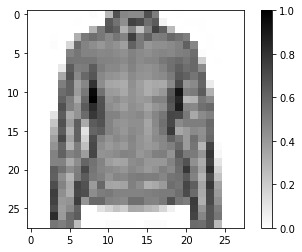

In [6]:
# Берём единственное изображение и удаляем из него цветовую составляющую посредством метода reshape()
for image, label in test_dataset.take(1): # label - цифра, которая ставится в соответствии принадлежности списку class_names
    break;
image = image.numpy().reshape((28, 28)) # в скобках указывается размер изображения (можно удалить цвет частично)

# Отрисовываем изображение
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

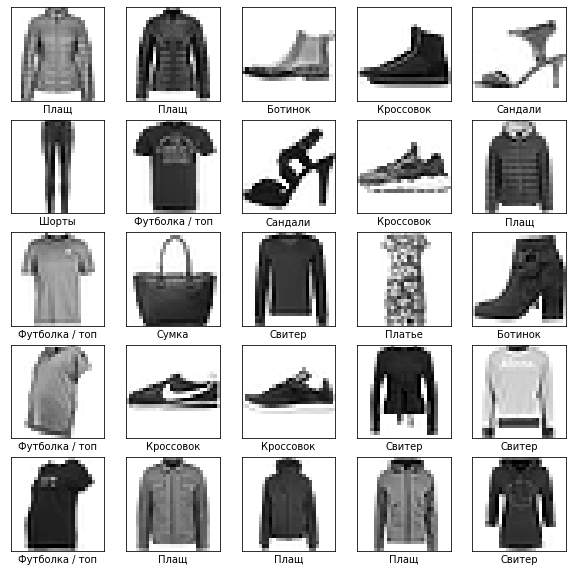

In [7]:
# Отображение первых 25 изображений из тренировочного датасета и под каждым изображением укажем к какому классу оно относится
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [8]:
# Создание модели и слоёв
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)), # Сглаживающий слой, преобразует матрицу 28х28 в одномерный вектор 
    tf.keras.layers.Dense(128, activation=tf.nn.relu), # Плотносвязный слой из 128 нейронов
    # (каждый нейрон принимает на вход все 784 значения вектора с предыдущего слоя)
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Выходной softmax-слой, состоит из 10 нейронов, каждый из которых
    # представляет определённый класс элемента одежды
])

In [9]:
# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Функция оптимизации - adam, то есть алгоритм "подгонки" весов и смещения для минимизации потерь
# Функция потерь - название в loss, алгоритм измеряет, насколько далеко находится желаемое значение от спрогнозированного
# Метрики — используются для мониторинга процесса тренировки и тестирования
# У нас метрикой выбрана точность - процент изображений, которые были корректно классифицированы

In [10]:
# Тренировка модели
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
# Метод dataset.repeat() используется для бесконечного количества повторений набора входных данных
# Метод dataset.shuffle(60000) перемешивает все изображения, чтобы на обучение модели не влиял порядок подачи входных данных
# Метод dataset.batch(32) сообщает методу тренировки model.fit использовать блоки по 32 изображения
test_dataset = test_dataset.batch(BATCH_SIZE)

In [11]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
# train_dataset отправляется на вход модели, модель учится сопоставлять входное изображение с меткой
# Параметр epochs=5 ограничивает количество тренировок до 5 полных обучающих итераций по набору данных,
# что в итоге даёт тренировку на 5 * 60000 = 300 000 примерах.

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4916 - accuracy: 0.8270
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3730 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3291 - accuracy: 0.8794
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3116 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2941 - accuracy: 0.8911


In [12]:
# Проверка точности на тестовом наборе данных
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))
print("Точность на тестовом наборе данных: ", test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3579 - accuracy: 0.8694
Точность на тестовом наборе данных:  0.8694000244140625


In [13]:
# Модель предсказывает метки для тестовых изображений
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)
predictions.shape

(32, 10)

In [14]:
# Вывод предсказания модели для первого изображения из тестировочного датасета
predictions[0]
# Выведет 10 чисел, которые описывают вероятность принадлежности изображения к одному из классов одежды / обуви

array([1.3334527e-05, 2.6391651e-06, 8.1063863e-03, 5.6375957e-06,
       9.6186209e-01, 1.5202584e-06, 2.9995020e-02, 8.7725471e-09,
       1.3438726e-05, 1.1098336e-09], dtype=float32)

In [15]:
# Вывод числа класса, к которому модель с большей вероятностью причислит изображение
np.argmax(predictions[0])

4

In [18]:
# Дополнительные функции для вывода информации с использованием matplotlib

def plot_image(i, predictions_array, true_label, images):
    predictions_array, true_label, img = predictions_array[i], true_label[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[...,0], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100 * np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

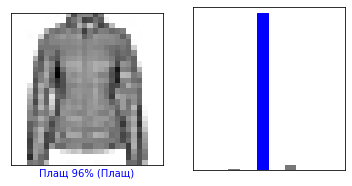

In [19]:
# Вывод "нулевого" изображения и информации о нём
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

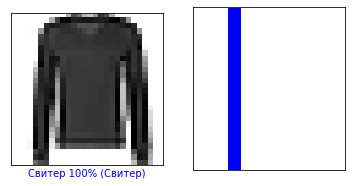

In [20]:
# Вывод 12-ого изображения и информации о нём
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

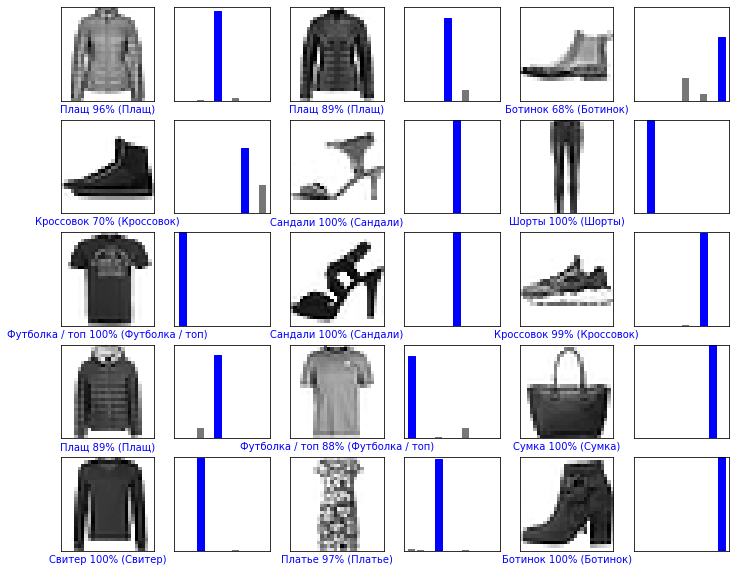

In [21]:
# Отображение нескольких изображений и предсказаний сети о них
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i + 2)
    plot_value_array(i, predictions, test_labels)

In [22]:
# Предсказание метки для одного изображения
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [23]:
# Добавление элемента в список
img = np.array([img])
print(img.shape)
# Предсказание результата
predictions_single = model.predict(img)
print(predictions_single)

(1, 28, 28, 1)
[[1.3334527e-05 2.6391699e-06 8.1063826e-03 5.6375957e-06 9.6186209e-01
  1.5202584e-06 2.9995028e-02 8.7725471e-09 1.3438687e-05 1.1098336e-09]]


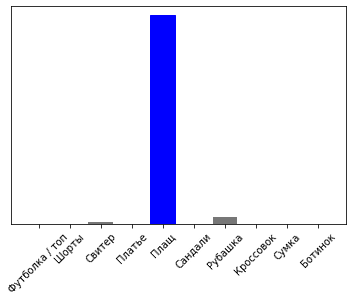

In [24]:
# Построение гистограммы на основе предсказанных результатов
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)